# Sowing Success: How Machine Learning Helps Farmers Select the Best Crops

![farmer in a field](farmer_in_a_field.jpg)

Measuring essential soil metrics such as nitrogen, phosphorous, potassium levels, and pH value is an important aspect of assessing soil condition. However, it can be an expensive and time-consuming process, which can cause farmers to prioritize which metrics to measure based on their budget constraints.

Farmers have various options when it comes to deciding which crop to plant each season. Their primary objective is to maximize the yield of their crops, taking into account different factors. One crucial factor that affects crop growth is the condition of the soil in the field, which can be assessed by measuring basic elements such as nitrogen and potassium levels. Each crop has an ideal soil condition that ensures optimal growth and maximum yield.

A farmer reached out to you as a machine learning expert for assistance in selecting the best crop for his field. They've provided you with a dataset called `soil_measures.csv`, which contains:

- `"N"`: Nitrogen content ratio in the soil
- `"P"`: Phosphorous content ratio in the soil
- `"K"`: Potassium content ratio in the soil
- `"pH"` value of the soil
- `"crop"`: categorical values that contain various crops (target variable).

Each row in this dataset represents various measures of the soil in a particular field. Based on these measurements, the crop specified in the `"crop"` column is the optimal choice for that field.  

In this project, you will build multi-class classification models to predict the type of `"crop"` and identify the single most importance feature for predictive performance.

In [41]:
import pandas as pd


In [42]:
# All required libraries are imported here for you.
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

import plotly.express as px
import plotly.graph_objects as go
from sklearn.preprocessing import StandardScaler

from sklearn import metrics

# Load the dataset
crops = pd.read_csv("../data/soil_measures.csv")

In [43]:
crops.sample(5)

,N,P,K,ph,crop
1316,102,14,52,6.510760,watermelon
1888,8,28,30,6.015672,coconut
1211,27,145,205,5.800243,grapes
1672,20,20,10,6.976998,orange
1609,13,23,6,7.365338,orange


In [44]:
crops.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   N       2200 non-null   int64  
 1   P       2200 non-null   int64  
 2   K       2200 non-null   int64  
 3   ph      2200 non-null   float64
 4   crop    2200 non-null   object 
dtypes: float64(1), int64(3), object(1)
memory usage: 86.1+ KB


In [45]:
crops.describe(include="all")

,N,P,K,ph,crop
count,2200.000000,2200.000000,2200.000000,2200.000000,2200
unique,NaN,NaN,NaN,NaN,22
top,NaN,NaN,NaN,NaN,rice
freq,NaN,NaN,NaN,NaN,100
mean,50.551818,53.362727,48.149091,6.469480,NaN
std,36.917334,32.985883,50.647931,0.773938,NaN
min,0.000000,5.000000,5.000000,3.504752,NaN
25%,21.000000,28.000000,20.000000,5.971693,NaN
50%,37.000000,51.000000,32.000000,6.425045,NaN
75%,84.250000,68.000000,49.000000,6.923643,NaN


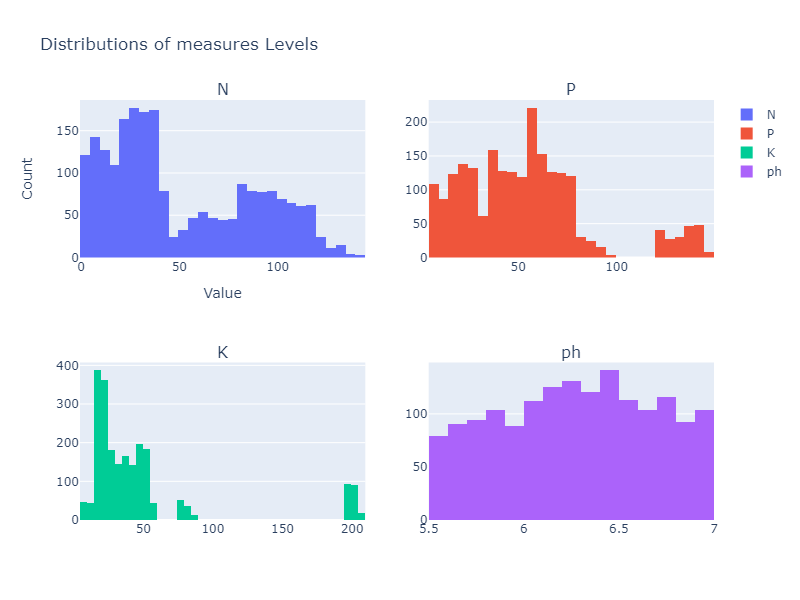

In [46]:
import plotly.subplots as ps
# Define custom bins for ph
ph_bins = [5.5, 5.75, 6, 6.25, 6.5, 6.75, 7]

# Create separate histograms for each variable
hist_N = go.Histogram(x=crops['N'], name='N')
hist_P = go.Histogram(x=crops['P'], name='P')
hist_K = go.Histogram(x=crops['K'], name='K')
hist_ph = go.Histogram(x=crops['ph'], name='ph', xbins=dict(start=min(ph_bins), end=max(ph_bins), size=0.1))

# Create subplots
fig = ps.make_subplots(rows=2, cols=2, subplot_titles=('N', 'P', 'K', 'ph')) 
fig.add_trace(hist_N, row=1, col=1)
fig.add_trace(hist_P, row=1, col=2)
fig.add_trace(hist_K, row=2, col=1)
fig.add_trace(hist_ph, row=2, col=2)

# Update layout
fig.update_layout(height=600, width=800, title='Distributions of measures Levels', 
                  xaxis=dict(title='Value'), yaxis=dict(title='Count'))
fig.show("png")


## which variable helps to predict the most?

In [47]:
X=crops.drop("crop",axis=1)
y=crops["crop"]

In [48]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=.2, random_state=42, 
                                                    stratify=y)

In [49]:
features_dict = {}

In [50]:
feature_performance={}

In [51]:
for feature in ["N", "P", "K", "ph"]:
    # Scale the data
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train[[feature]])
    X_test_scaled = scaler.transform(X_test[[feature]])
    
    # Create and fit the logistic regression model
    log_reg = LogisticRegression(multi_class="multinomial", max_iter=1000)  # Increase max_iter
    log_reg.fit(X_train_scaled, y_train)
    
    # Predict on the test set
    y_pred = log_reg.predict(X_test_scaled)
    
    # Calculate F1-score
    f1 = metrics.f1_score(y_test, y_pred, average="weighted")
    
    # Add feature-f1 score pairs to the dictionary
    feature_performance[feature] = f1
    print(f"F1-score for {feature}: {f1}")

F1-score for N: 0.10163179859446461
F1-score for P: 0.13997712003244786
F1-score for K: 0.20227438033488054
F1-score for ph: 0.0753255620774562


it seems that potasio helps the most.

Now lests create a benchmarck of models

In [52]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=.2, random_state=42, 
                                                    stratify=y)

Logistic Regression: Mean Accuracy = 0.6613904947644587
KNN: Mean Accuracy = 0.7409064877373019
Decision Tree: Mean Accuracy = 0.7676414137896342


XGBoost: Mean Accuracy = 0.7914915681858637


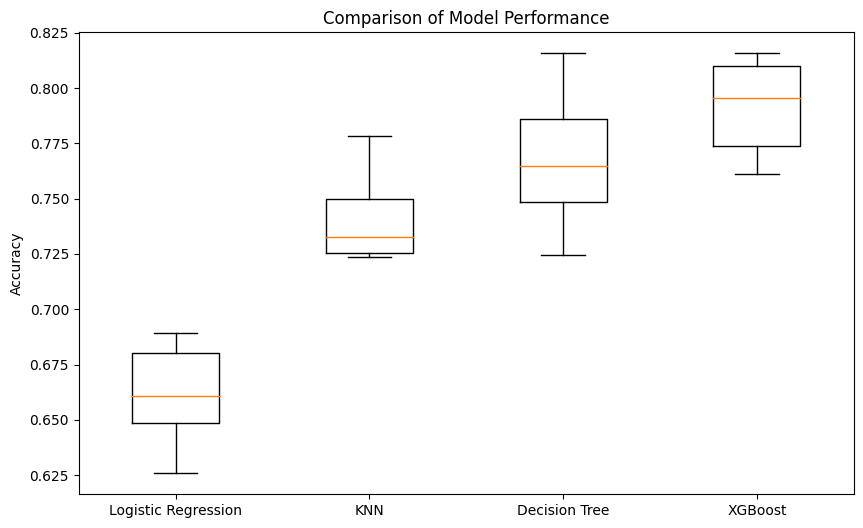

In [53]:
from sklearn.model_selection import cross_val_score, KFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from xgboost import XGBClassifier
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Fit and transform the labels
y_train_encoded = label_encoder.fit_transform(y_train)

# Create a dictionary of models
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "KNN": KNeighborsClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "XGBoost": XGBClassifier()  # Add XGBoost
}

# Create an empty list to store the results
results = []

# Loop through each model
for name, model in models.items():
    # Create a pipeline with standard scaler and the model
    pipeline = Pipeline([('scaler', StandardScaler()), ('model', model)])
    
    # Perform cross-validation
    kf = KFold(n_splits=6, random_state=12, shuffle=True)
    cv_results = cross_val_score(pipeline, X_train, y_train_encoded, cv=kf)
    
    # Store the results
    results.append((name, cv_results))
    
    # Print the mean accuracy of the model
    print(f"{name}: Mean Accuracy = {cv_results.mean()}")

# Plot the results
plt.figure(figsize=(10, 6))
plt.boxplot([cv_results for _, cv_results in results], labels=[name for name, _ in results])
plt.ylabel('Accuracy')
plt.title('Comparison of Model Performance')
plt.show()



In [94]:

import pandas as pd
from sklearn.model_selection import GridSearchCV, train_test_split
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import LabelEncoder

# Load the dataset
df = pd.read_csv("../data/soil_measures.csv")

# Split the data into features (X) and target (y)
X = df.drop(columns=["crop"])
y = df["crop"]

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Fit and transform the labels
y_encoded = label_encoder.fit_transform(y)

# Split the data into training, validation, and testing sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y_encoded, test_size=0.4, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)
# Define the parameter grid for GridSearchCV
param_grid = {
    'max_depth': [3, 5, 7],
    'learning_rate': [0.1, 0.01, 0.001],
    'n_estimators': [100, 500, 1000]
}

# Initialize XGBoost classifier
xgb = XGBClassifier()

# Perform GridSearchCV for parameter selection
grid_search = GridSearchCV(estimator=xgb, param_grid=param_grid, cv=5, scoring='f1_weighted')
grid_search.fit(X_train, y_train)

# Get the best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

# Train the final model with the best parameters using the entire training set
best_xgb = XGBClassifier(**best_params)
best_xgb.fit(X_train, y_train)

# Evaluate the model on the testing set
y_pred = best_xgb.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Print evaluation metrics
print("Evaluation Metrics on Testing Set:")
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-score: {f1}")


Evaluation Metrics on Testing Set:
Accuracy: 0.8136363636363636
Precision: 0.8412234772294339
Recall: 0.8136363636363636
F1-score: 0.800109699410754


In [121]:
y_val_df = pd.DataFrame(y_val, columns=['crop']).reset_index(drop=True)
X_val_df = pd.DataFrame(X_val).reset_index(drop=True)

# Merge the DataFrames
val_data = pd.concat([X_val_df, y_val_df], axis=1)

# Drop the index columns
val_data.reset_index(drop=True, inplace=True)

In [123]:
val_data.head()

,N,P,K,ph,crop
0,17,64,18,6.079385,18
1,2,131,199,6.017370,0
2,24,130,195,6.112306,7
3,23,142,197,6.000574,7
4,38,14,30,5.570745,4


In [124]:
val_data.to_csv('val_data.csv', index=False)

In [125]:
# Save the trained model as a pickle file
with open('xgboost_model.pkl', 'wb') as f:
    pickle.dump(best_xgb, f)
    pickle.dump(label_encoder, f)

# ----------------------------------------------------------------------------

In [140]:
# Load the trained model from the pickle file
with open('xgboost_model.pkl', 'rb') as f:
    loaded_model = pickle.load(f)
    label_encoder = pickle.load(f)

# Load new data
new_data = pd.read_csv("val_data.csv")
X_val=new_data.drop("crop",axis=1)
y_val=new_data["crop"]

# Predict crop labels for new data
predictions = loaded_model.predict(X_val)

# Inverse transform the encoded predictions
predicted_labels = label_encoder.inverse_transform(predictions)

# Create a DataFrame with actual and predicted crop labels
prediction_df = pd.DataFrame({'Actual Crop': y_val, 'Predicted Crop': predicted_labels})

# Display the first few rows of the DataFrame
print("DataFrame with Actual and Predicted Crop Labels:")
final=pd.concat([new_data, prediction_df], axis=1).drop("Actual Crop",axis=1)
display(final)

# Evaluate the model on the validation set
print("\nEvaluation Metrics on Validation Set:")
accuracy = accuracy_score(y_val, predictions)
precision = precision_score(y_val, predictions, average='weighted')
recall = recall_score(y_val, predictions, average='weighted')
f1 = f1_score(y_val, predictions, average='weighted')
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-score: {f1}")

DataFrame with Actual and Predicted Crop Labels:


,N,P,K,ph,crop,Predicted Crop
0,17,64,18,6.079385,18,lentil
1,2,131,199,6.017370,0,grapes
2,24,130,195,6.112306,7,grapes
3,23,142,197,6.000574,7,grapes
4,38,14,30,5.570745,4,coconut
...,...,...,...,...,...,...
435,100,10,53,6.211749,21,muskmelon
436,39,24,39,6.431266,19,pomegranate
437,39,16,27,4.934965,12,mango
438,99,55,35,6.501698,20,jute



Evaluation Metrics on Validation Set:
Accuracy: 0.8068181818181818
Precision: 0.8165589692961237
Recall: 0.8068181818181818
F1-score: 0.8000497059853576
